# **Week 3 Q2**
____
Implement the multiplication of two N-bit numbers (using Divide and Conquer Strategy) and 
naive multiplication method. Compare these methods in terms of time taken using N-bit 
numbers where n=4, 8, 16, 32 and 64.
______

### **N BIT MULTIPLICATION VS NAIVE BITWISE SHIFT MULTIPLICATION**

##### Importing all the modules redquired

In [178]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> #### **N BIT MULTIPLICATION**
---

In [179]:
def n_bit_multiply(A, B, n):
    # Convert A and B to n-bit binary strings
    A = bin(A)[2:].zfill(n)
    B = bin(B)[2:].zfill(n)

    # Divide A and B into two n/2-bit halves
    A1 = int(A[:n//2], 2)
    A0 = int(A[n//2:], 2)
    B1 = int(B[:n//2], 2)
    B0 = int(B[n//2:], 2)

    # Compute the products of A1*B1, A1*B0, A0*B1, and A0*B0
    P1 = A1 * B1
    P2 = A1 * B0
    P3 = A0 * B1
    P4 = A0 * B0

    # Compute the final product using the n-bit multiplication method formula
    product = (P1 << n) + ((P2 + P3) << n//2) + P4

    return product

> #### **NAIVE BITWISE SHIFTING MULTIPLICATION**
---

##### _Note - We are not using the inbuilt "*" multiply operator of python as it is highly optimized and the time comes out to be neglegible_

In [180]:
def naive_multiply(a,b):

    product = 0
    while b != 0:
        if b & 1 == 1:
            product += a
        a <<= 1
        b >>= 1
    return product


**Storing the time taken by both methods**

In [181]:
n_bit = []
naive = []

In [182]:
for i in [2,4,8,16,32,64]:
    tik = time()
    for p in range(1000):
        n_bit_multiply(2**i-i,2**i-i,2*i)
    toc = time()
    n_bit.append(toc-tik)

In [183]:
for i in [2,4,8,16,32,64]:
    tik = time()
    for p in range(1000):
        naive_multiply(2**i-i,2**i-i)
    toc = time()
    naive.append(toc-tik)

**Creating DataFrame using Pandas DataFrame for easy plotting**

In [184]:
my_arr = np.array([n_bit,naive]).transpose()
my_index = np.array([2,4,8,16,32,64])
my_col = np.array(["N Bit Multiplication", "Naive Multiplication"])

In [185]:
df = pd.DataFrame(my_arr,index=my_index,columns=my_col)

In [186]:
df

,N Bit Multiplication,Naive Multiplication
2,0.000961,0.000000
4,0.000997,0.000000
8,0.001002,0.000993
16,0.001025,0.001056
32,0.002063,0.002721
64,0.001593,0.005564


(0.0, 0.01)

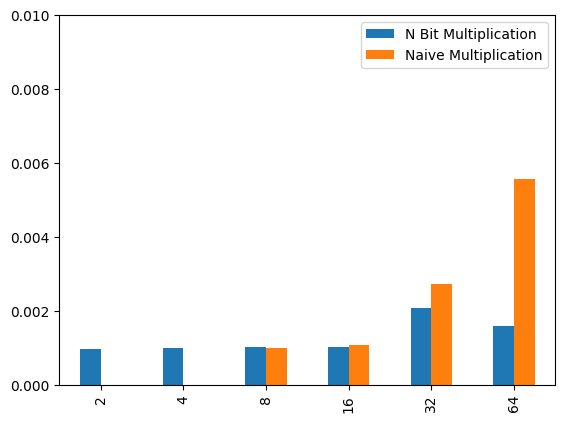

In [189]:
df.plot(kind='bar')
plt.ylim(0,0.01)

#### _Before 8 Bit Numbers, The time taken by Naive Method is neglegible but after that, The time taken by N Bit Multiplication is remarkabley less than Naive Multiplication_

---